In [49]:
import pandas as pd
pd.set_option('display.max_columns', 999)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt

## Initialize train/test data

## Big Sample Data

In [50]:
headers_list = pd.read_csv('Resources/Data/Rideshare_Layout.txt', header = None)

In [51]:
header_names = headers_list[0].to_list()
header_names

[';    "Trip ID" character(40) COLLATE pg_catalog."default"',
 '    "Trip Start Timestamp" timestamp without time zone',
 '    "Trip Seconds" integer',
 '    "Fare" numeric',
 '    "Trip Miles" numeric',
 '    "Pickup Community Area" numeric',
 '    "Dropoff Community Area" numeric',
 '    "Pickup Centroid Latitude" character(60) COLLATE pg_catalog."default"',
 '    "Pickup Centroid Longitude" character(60) COLLATE pg_catalog."default"',
 '    "Dropoff Centroid Longitude" character(60) COLLATE pg_catalog."default"',
 '    "Dropoff Centroid Latitude" character(60) COLLATE pg_catalog."default"',
 '    "Mon" boolean',
 '    "Tue" boolean',
 '    "Wed" boolean',
 '    "Thu" boolean',
 '    "Fri" boolean',
 '    "Sat" boolean',
 '    "Sun" boolean',
 '    "Time_0_0" boolean',
 '    "Time_0_15" boolean',
 '    "Time_0_30" boolean',
 '    "Time_0_45" boolean',
 '    "Time_1_0" boolean',
 '    "Time_1_15" boolean',
 '    "Time_1_30" boolean',
 '    "Time_1_45" boolean',
 '    "Time_2_0" boolea

In [52]:
values_df = pd.read_csv('Resources/Data/Rideshare_fixed.csv', header = None)

In [53]:
values_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273
0,be9de796ab2abcbae1d77ced9d9d21021e2284a4,2019-04-23 05:45:00,377.0,7.5,3.9,24,16,41.898306,-87.653614,-87.722611,41.950078,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,57.34,52.83,1010.8,89,NaN,NaN
1,90753342407656d346d0319811e6cfaa71431283,2019-04-11 17:30:00,959.0,7.5,2.5,7,8,41.914747,-87.654007,-87.631864,41.892042,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,57.00,53.96,1000.8,79,NaN,NaN
2,4a813a48ec90afec16c42c360cd3ff584679bdaf,2019-04-13 05:45:00,758.0,10.0,5.3,22,32,41.922761,-87.699155,-87.625192,41.878866,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,37.08,29.53,1016.7,52,NaN,NaN
3,c27a1dcc7a9c12b27a25b1f558ebd238b09eafd8,2019-04-03 14:15:00,604.0,7.5,2.0,45,43,41.745842,-87.591708,-87.581350,41.769690,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,56.68,42.28,1024.7,27,NaN,NaN
4,dfb927c00257464d44ed91cbfc3f903436d8dad1,2019-04-03 19:45:00,1023.0,12.5,7.7,77,8,41.986712,-87.663416,-87.633308,41.899602,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,

In [54]:
initial_df = pd.read_csv('Extract_with_headers.csv')

In [55]:
headers = initial_df.columns.to_list()
additional_cols = ['temp', 'feels_like', 'pressure', 'humidity', 'rain_1h', 'snow_1h']
for element in additional_cols:
    headers.append(element)

In [56]:
values_df.columns = headers

In [57]:
values_df.head()

,Trip ID,Trip Start Timestamp,Trip Seconds,Fare,Trip Miles,Pickup Community Area,Dropoff Community Area,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Longitude,Dropoff Centroid Latitude,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Time_0_0,Time_0_15,Time_0_30,Time_0_45,Time_1_0,Time_1_15,Time_1_30,Time_1_45,Time_2_0,Time_2_15,Time_2_30,Time_2_45,Time_3_0,Time_3_15,Time_3_30,Time_3_45,Time_4_0,Time_4_15,Time_4_30,Time_4_45,Time_5_0,Time_5_15,Time_5_30,Time_5_45,Time_6_0,Time_6_15,Time_6_30,Time_6_45,Time_7_0,Time_7_15,Time_7_30,Time_7_45,Time_8_0,Time_8_15,Time_8_30,Time_8_45,Time_9_0,Time_9_15,Time_9_30,Time_9_45,Time_10_0,Time_10_15,Time_10_30,Time_10_45,Time_11_0,Time_11_15,Time_11_30,Time_11_45,Time_12_0,Time_12_15,Time_12_30,Time_12_45,Time_13_0,Time_13_15,Time_13_30,Time_13_45,Time_14_0,Time_14_15,Time_14_30,Time_14_45,Time_15_0,Time_15_15,Time_15_30,Time_15_45,Time_16_0,Time_16_15,Time_16_30,Time_16_45,Time_17_0,Time_17_15,Time_17_30,Time_17_45,Time_18_0,Time_18_15,Time_18_30,Time_18_45,Time_19_0,Time_19_15,Time_19_30,Time_19_45,Time_20_0,Time_20_15,Time_20_30,Time_20_45,Time_21_0,Time_21_15,Time_21_30,Time_21_45,Time_22_0,Time_22_15,Time_22_30,Time_22_45,Time_23_0,Time_23_15,Time_23_30,Time_23_45,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31,PCA_32,PCA_33,PCA_34,PCA_35,PCA_36,PCA_37,PCA_38,PCA_39,PCA_40,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49,PCA_50,PCA_51,PCA_52,PCA_53,PCA_54,PCA_55,PCA_56,PCA_57,PCA_58,PCA_59,PCA_60,PCA_61,PCA_62,PCA_63,PCA_64,PCA_65,PCA_66,PCA_67,PCA_68,PCA_69,PCA_70,PCA_71,PCA_72,PCA_73,PCA_74,PCA_75,PCA_76,PCA_77,DCA_1,DCA_2,DCA_3,DCA_4,DCA_5,DCA_6,DCA_7,DCA_8,DCA_9,DCA_10,DCA_11,DCA_12,DCA_13,DCA_14,DCA_15,DCA_16,DCA_17,DCA_18,DCA_19,DCA_20,DCA_21,DCA_22,DCA_23,DCA_24,DCA_25,DCA_26,DCA_27,DCA_28,DCA_29,DCA_30,DCA_31,DCA_32,DCA_33,DCA_34,DCA_35,DCA_36,DCA_37,DCA_38,DCA_39,DCA_40,DCA_41,DCA_42,DCA_43,DCA_44,DCA_45,DCA_46,DCA_47,DCA_48,DCA_49,DCA_50,DCA_51,DCA_52,DCA_53,DCA_54,DCA_55,DCA_56,DCA_57,DCA_58,DCA_59,DCA_60,DCA_61,DCA_62,DCA_63,DCA_64,DCA_65,DCA_66,DCA_67,DCA_68,DCA_69,DCA_70,DCA_71,DCA_72,DCA_73,DCA_74,DCA_75,DCA_76,DCA_77,temp,feels_like,pressure,humidity,rain_1h,snow_1h
0,be9de796ab2abcbae1d77ced9d9d21021e2284a4,2019-04-23 05:45:00,377.0,7.5,3.9,24,16,41.898306,-87.653614,-87.722611,41.950078,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,57.34,52.83,1010.8,89,NaN,NaN
1,90753342407656d346d0319811e6cfaa71431283,2019-04-11 17:30:00,959.0,7.5,2.5,7,8,41.914747,-87.654007,-87.631864,41.892042,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,57.00,53.96,1000.8,79,NaN,NaN
2,4a813a48ec90afec16c42c360cd3ff584679bdaf,2019-04-13 05:45:00,758.0,10.0,5.3,22,32,41.922761,-87.699155,-87.625192,41.878866,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,

In [58]:
# Replace rain_1h and snow_1h NaN as zero
values_df['rain_1h'] = values_df['rain_1h'].fillna(0)
values_df['snow_1h'] = values_df['snow_1h'].fillna(0)

In [59]:
values_df.head()

,Trip ID,Trip Start Timestamp,Trip Seconds,Fare,Trip Miles,Pickup Community Area,Dropoff Community Area,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Longitude,Dropoff Centroid Latitude,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Time_0_0,Time_0_15,Time_0_30,Time_0_45,Time_1_0,Time_1_15,Time_1_30,Time_1_45,Time_2_0,Time_2_15,Time_2_30,Time_2_45,Time_3_0,Time_3_15,Time_3_30,Time_3_45,Time_4_0,Time_4_15,Time_4_30,Time_4_45,Time_5_0,Time_5_15,Time_5_30,Time_5_45,Time_6_0,Time_6_15,Time_6_30,Time_6_45,Time_7_0,Time_7_15,Time_7_30,Time_7_45,Time_8_0,Time_8_15,Time_8_30,Time_8_45,Time_9_0,Time_9_15,Time_9_30,Time_9_45,Time_10_0,Time_10_15,Time_10_30,Time_10_45,Time_11_0,Time_11_15,Time_11_30,Time_11_45,Time_12_0,Time_12_15,Time_12_30,Time_12_45,Time_13_0,Time_13_15,Time_13_30,Time_13_45,Time_14_0,Time_14_15,Time_14_30,Time_14_45,Time_15_0,Time_15_15,Time_15_30,Time_15_45,Time_16_0,Time_16_15,Time_16_30,Time_16_45,Time_17_0,Time_17_15,Time_17_30,Time_17_45,Time_18_0,Time_18_15,Time_18_30,Time_18_45,Time_19_0,Time_19_15,Time_19_30,Time_19_45,Time_20_0,Time_20_15,Time_20_30,Time_20_45,Time_21_0,Time_21_15,Time_21_30,Time_21_45,Time_22_0,Time_22_15,Time_22_30,Time_22_45,Time_23_0,Time_23_15,Time_23_30,Time_23_45,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31,PCA_32,PCA_33,PCA_34,PCA_35,PCA_36,PCA_37,PCA_38,PCA_39,PCA_40,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49,PCA_50,PCA_51,PCA_52,PCA_53,PCA_54,PCA_55,PCA_56,PCA_57,PCA_58,PCA_59,PCA_60,PCA_61,PCA_62,PCA_63,PCA_64,PCA_65,PCA_66,PCA_67,PCA_68,PCA_69,PCA_70,PCA_71,PCA_72,PCA_73,PCA_74,PCA_75,PCA_76,PCA_77,DCA_1,DCA_2,DCA_3,DCA_4,DCA_5,DCA_6,DCA_7,DCA_8,DCA_9,DCA_10,DCA_11,DCA_12,DCA_13,DCA_14,DCA_15,DCA_16,DCA_17,DCA_18,DCA_19,DCA_20,DCA_21,DCA_22,DCA_23,DCA_24,DCA_25,DCA_26,DCA_27,DCA_28,DCA_29,DCA_30,DCA_31,DCA_32,DCA_33,DCA_34,DCA_35,DCA_36,DCA_37,DCA_38,DCA_39,DCA_40,DCA_41,DCA_42,DCA_43,DCA_44,DCA_45,DCA_46,DCA_47,DCA_48,DCA_49,DCA_50,DCA_51,DCA_52,DCA_53,DCA_54,DCA_55,DCA_56,DCA_57,DCA_58,DCA_59,DCA_60,DCA_61,DCA_62,DCA_63,DCA_64,DCA_65,DCA_66,DCA_67,DCA_68,DCA_69,DCA_70,DCA_71,DCA_72,DCA_73,DCA_74,DCA_75,DCA_76,DCA_77,temp,feels_like,pressure,humidity,rain_1h,snow_1h
0,be9de796ab2abcbae1d77ced9d9d21021e2284a4,2019-04-23 05:45:00,377.0,7.5,3.9,24,16,41.898306,-87.653614,-87.722611,41.950078,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,57.34,52.83,1010.8,89,0.0,0.0
1,90753342407656d346d0319811e6cfaa71431283,2019-04-11 17:30:00,959.0,7.5,2.5,7,8,41.914747,-87.654007,-87.631864,41.892042,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,57.00,53.96,1000.8,79,0.0,0.0
2,4a813a48ec90afec16c42c360cd3ff584679bdaf,2019-04-13 05:45:00,758.0,10.0,5.3,22,32,41.922761,-87.699155,-87.625192,41.878866,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,

In [60]:
timestamps = pd.DataFrame(values_df['Trip Start Timestamp'])

In [61]:
timestamps['parsed_time'] = timestamps['Trip Start Timestamp']

In [62]:
timestamps.head()

,Trip Start Timestamp,parsed_time
0,2019-04-23 05:45:00,2019-04-23 05:45:00
1,2019-04-11 17:30:00,2019-04-11 17:30:00
2,2019-04-13 05:45:00,2019-04-13 05:45:00
3,2019-04-03 14:15:00,2019-04-03 14:15:00
4,2019-04-03 19:45:00,2019-04-03 19:45:00


In [63]:
for index, row in timestamps.iterrows():
    row['parsed_time'] = row['parsed_time'][5:7]

In [64]:
timestamps['parsed_time'] = timestamps['parsed_time'].astype(int)

In [65]:
timestamps.head()

,Trip Start Timestamp,parsed_time
0,2019-04-23 05:45:00,4
1,2019-04-11 17:30:00,4
2,2019-04-13 05:45:00,4
3,2019-04-03 14:15:00,4
4,2019-04-03 19:45:00,4


In [66]:
timestamps['January'] = 0
timestamps['February'] = 0
timestamps['March'] = 0
timestamps['April'] = 0
timestamps['May'] = 0
timestamps['June'] = 0
timestamps['July'] = 0
timestamps['August'] = 0
timestamps['September'] = 0
timestamps['October'] = 0
timestamps['November'] = 0
timestamps['December'] = 0

In [67]:
timestamps.dtypes

Trip Start Timestamp    object
parsed_time              int64
January                  int64
February                 int64
March                    int64
April                    int64
May                      int64
June                     int64
July                     int64
August                   int64
September                int64
October                  int64
November                 int64
December                 int64
dtype: object

In [68]:
def one_hot(dataframe):
    for index, row in dataframe.iterrows(): 
        if(int(row['parsed_time']) == 1):
            dataframe.at[index, 'January'] = 1
        elif(int(row['parsed_time']) == 2):
            dataframe.at[index, 'February'] = 1
        elif(int(row['parsed_time']) == 3):
            dataframe.at[index, 'March'] = 1
        elif(int(row['parsed_time']) == 4):
            dataframe.at[index, 'April'] = 1
        elif(int(row['parsed_time']) == 5):
            dataframe.at[index, 'May'] = 1
        elif(int(row['parsed_time']) == 6):
            dataframe.at[index, 'June'] = 1
        elif(int(row['parsed_time']) == 7):
            dataframe.at[index, 'July'] = 1
        elif(int(row['parsed_time']) == 8):
            dataframe.at[index, 'August'] = 1
        elif(int(row['parsed_time']) == 9):
            dataframe.at[index, 'September'] = 1
        elif(int(row['parsed_time']) == 10):
            dataframe.at[index, 'October'] = 1
        elif(int(row['parsed_time']) == 11):
            dataframe.at[index, 'November'] = 1
        elif(int(row['parsed_time']) == 12):
            dataframe.at[index, 'December'] = 1
    return dataframe

In [69]:
one_hot_df = one_hot(timestamps)

In [70]:
one_hot_df['July'].head()

0    0
1    0
2    0
3    0
4    0
Name: July, dtype: int64

In [71]:
values_df['January'] = one_hot_df['January']
values_df['February'] = one_hot_df['February']
values_df['March'] = one_hot_df['March']
values_df['April'] = one_hot_df['April']
values_df['May'] = one_hot_df['May']
values_df['June'] = one_hot_df['June']
values_df['July'] = one_hot_df['July']
values_df['August'] = one_hot_df['August']
values_df['September'] = one_hot_df['September']
values_df['October'] = one_hot_df['October']
values_df['November'] = one_hot_df['November']
values_df['December'] = one_hot_df['December']

In [72]:
values_df.head()

,Trip ID,Trip Start Timestamp,Trip Seconds,Fare,Trip Miles,Pickup Community Area,Dropoff Community Area,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Longitude,Dropoff Centroid Latitude,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Time_0_0,Time_0_15,Time_0_30,Time_0_45,Time_1_0,Time_1_15,Time_1_30,Time_1_45,Time_2_0,Time_2_15,Time_2_30,Time_2_45,Time_3_0,Time_3_15,Time_3_30,Time_3_45,Time_4_0,Time_4_15,Time_4_30,Time_4_45,Time_5_0,Time_5_15,Time_5_30,Time_5_45,Time_6_0,Time_6_15,Time_6_30,Time_6_45,Time_7_0,Time_7_15,Time_7_30,Time_7_45,Time_8_0,Time_8_15,Time_8_30,Time_8_45,Time_9_0,Time_9_15,Time_9_30,Time_9_45,Time_10_0,Time_10_15,Time_10_30,Time_10_45,Time_11_0,Time_11_15,Time_11_30,Time_11_45,Time_12_0,Time_12_15,Time_12_30,Time_12_45,Time_13_0,Time_13_15,Time_13_30,Time_13_45,Time_14_0,Time_14_15,Time_14_30,Time_14_45,Time_15_0,Time_15_15,Time_15_30,Time_15_45,Time_16_0,Time_16_15,Time_16_30,Time_16_45,Time_17_0,Time_17_15,Time_17_30,Time_17_45,Time_18_0,Time_18_15,Time_18_30,Time_18_45,Time_19_0,Time_19_15,Time_19_30,Time_19_45,Time_20_0,Time_20_15,Time_20_30,Time_20_45,Time_21_0,Time_21_15,Time_21_30,Time_21_45,Time_22_0,Time_22_15,Time_22_30,Time_22_45,Time_23_0,Time_23_15,Time_23_30,Time_23_45,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31,PCA_32,PCA_33,PCA_34,PCA_35,PCA_36,PCA_37,PCA_38,PCA_39,PCA_40,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49,PCA_50,PCA_51,PCA_52,PCA_53,PCA_54,PCA_55,PCA_56,PCA_57,PCA_58,PCA_59,PCA_60,PCA_61,PCA_62,PCA_63,PCA_64,PCA_65,PCA_66,PCA_67,PCA_68,PCA_69,PCA_70,PCA_71,PCA_72,PCA_73,PCA_74,PCA_75,PCA_76,PCA_77,DCA_1,DCA_2,DCA_3,DCA_4,DCA_5,DCA_6,DCA_7,DCA_8,DCA_9,DCA_10,DCA_11,DCA_12,DCA_13,DCA_14,DCA_15,DCA_16,DCA_17,DCA_18,DCA_19,DCA_20,DCA_21,DCA_22,DCA_23,DCA_24,DCA_25,DCA_26,DCA_27,DCA_28,DCA_29,DCA_30,DCA_31,DCA_32,DCA_33,DCA_34,DCA_35,DCA_36,DCA_37,DCA_38,DCA_39,DCA_40,DCA_41,DCA_42,DCA_43,DCA_44,DCA_45,DCA_46,DCA_47,DCA_48,DCA_49,DCA_50,DCA_51,DCA_52,DCA_53,DCA_54,DCA_55,DCA_56,DCA_57,DCA_58,DCA_59,DCA_60,DCA_61,DCA_62,DCA_63,DCA_64,DCA_65,DCA_66,DCA_67,DCA_68,DCA_69,DCA_70,DCA_71,DCA_72,DCA_73,DCA_74,DCA_75,DCA_76,DCA_77,temp,feels_like,pressure,humidity,rain_1h,snow_1h,January,February,March,April,May,June,July,August,September,October,November,December
0,be9de796ab2abcbae1d77ced9d9d21021e2284a4,2019-04-23 05:45:00,377.0,7.5,3.9,24,16,41.898306,-87.653614,-87.722611,41.950078,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,57.34,52.83,1010.8,89,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0
1,90753342407656d346d0319811e6cfaa71431283,2019-04-11 17:30:00,959.0,7.5,2.5,7,8,41.914747,-87.654007,-87.631864,41.892042,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,57.00,53.96,1000.8,79,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0
2,4a813a48ec90afec16c42c360cd3ff584679bdaf,2019-04-13 05:45:00,758.0,10.0,5.3,22,32,41.922761,-87.699155,-87.625192,41.878866,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,f,

In [74]:
# values_df['Mon'].value_counts()
# values_df['Tue'].value_counts()
# values_df['Wed'].value_counts()
values_df['Thu'].value_counts()
# values_df['Fri'].value_counts()
# values_df['Sat'].value_counts()
# values_df['Sun'].value_counts()

f    1031278
t     168722
Name: Thu, dtype: int64

## Don't mess with this

In [75]:
X = values_df.drop(['Trip ID', 'Trip Start Timestamp'], axis = 1)

In [ ]:
# initial_df = pd.read_csv('Extract_with_headers.csv')

In [ ]:
# initial_df.head()

In [ ]:
# X = initial_df.drop(['Trip ID', 'Trip Start Timestamp', 'PCA_77', 'DCA_77'], axis = 1)

## Drop N/A values, then create X/y split

In [76]:
X = X.dropna().reset_index(drop = True)

In [77]:
len(X.columns)

284

In [78]:
y = X['Fare']

In [79]:
X = X.drop(['Fare'], axis = 1)

## Confirm X and y have same length

In [80]:
X.shape

(1197590, 283)

In [81]:
len(y)

1197590

In [82]:
for column in range(len(X.columns)):
    print(X.columns[column])

Trip Seconds
Trip Miles
Pickup Community Area
Dropoff Community Area
Pickup Centroid Latitude
Pickup Centroid Longitude
Dropoff Centroid Longitude
Dropoff Centroid Latitude
Mon
Tue
Wed
Thu
Fri
Sat
Sun
Time_0_0
Time_0_15
Time_0_30
Time_0_45
Time_1_0
Time_1_15
Time_1_30
Time_1_45
Time_2_0
Time_2_15
Time_2_30
Time_2_45
Time_3_0
Time_3_15
Time_3_30
Time_3_45
Time_4_0
Time_4_15
Time_4_30
Time_4_45
Time_5_0
Time_5_15
Time_5_30
Time_5_45
Time_6_0
Time_6_15
Time_6_30
Time_6_45
Time_7_0
Time_7_15
Time_7_30
Time_7_45
Time_8_0
Time_8_15
Time_8_30
Time_8_45
Time_9_0
Time_9_15
Time_9_30
Time_9_45
Time_10_0
Time_10_15
Time_10_30
Time_10_45
Time_11_0
Time_11_15
Time_11_30
Time_11_45
Time_12_0
Time_12_15
Time_12_30
Time_12_45
Time_13_0
Time_13_15
Time_13_30
Time_13_45
Time_14_0
Time_14_15
Time_14_30
Time_14_45
Time_15_0
Time_15_15
Time_15_30
Time_15_45
Time_16_0
Time_16_15
Time_16_30
Time_16_45
Time_17_0
Time_17_15
Time_17_30
Time_17_45
Time_18_0
Time_18_15
Time_18_30
Time_18_45
Time_19_0
Time_19_15
T

## Replace 't', 'f' with 1,0 for Boolean analysis

In [83]:
# for index, row in X.iterrows():
#     print(f'Beginning analysis on index = {index}')
#     for j in range(len(X.columns)):
#         if(X.at[index, X.columns[j]]) == 'f':
#             X.at[index, X.columns[j]] = 0
#         elif(X.at[index, X.columns[j]]) == 't':
#             X.at[index, X.columns[j]] = 1

In [84]:
X = X.replace({'f': 0, 't':1})


In [85]:
X.head(10)

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Longitude,Dropoff Centroid Latitude,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Time_0_0,Time_0_15,Time_0_30,Time_0_45,Time_1_0,Time_1_15,Time_1_30,Time_1_45,Time_2_0,Time_2_15,Time_2_30,Time_2_45,Time_3_0,Time_3_15,Time_3_30,Time_3_45,Time_4_0,Time_4_15,Time_4_30,Time_4_45,Time_5_0,Time_5_15,Time_5_30,Time_5_45,Time_6_0,Time_6_15,Time_6_30,Time_6_45,Time_7_0,Time_7_15,Time_7_30,Time_7_45,Time_8_0,Time_8_15,Time_8_30,Time_8_45,Time_9_0,Time_9_15,Time_9_30,Time_9_45,Time_10_0,Time_10_15,Time_10_30,Time_10_45,Time_11_0,Time_11_15,Time_11_30,Time_11_45,Time_12_0,Time_12_15,Time_12_30,Time_12_45,Time_13_0,Time_13_15,Time_13_30,Time_13_45,Time_14_0,Time_14_15,Time_14_30,Time_14_45,Time_15_0,Time_15_15,Time_15_30,Time_15_45,Time_16_0,Time_16_15,Time_16_30,Time_16_45,Time_17_0,Time_17_15,Time_17_30,Time_17_45,Time_18_0,Time_18_15,Time_18_30,Time_18_45,Time_19_0,Time_19_15,Time_19_30,Time_19_45,Time_20_0,Time_20_15,Time_20_30,Time_20_45,Time_21_0,Time_21_15,Time_21_30,Time_21_45,Time_22_0,Time_22_15,Time_22_30,Time_22_45,Time_23_0,Time_23_15,Time_23_30,Time_23_45,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31,PCA_32,PCA_33,PCA_34,PCA_35,PCA_36,PCA_37,PCA_38,PCA_39,PCA_40,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49,PCA_50,PCA_51,PCA_52,PCA_53,PCA_54,PCA_55,PCA_56,PCA_57,PCA_58,PCA_59,PCA_60,PCA_61,PCA_62,PCA_63,PCA_64,PCA_65,PCA_66,PCA_67,PCA_68,PCA_69,PCA_70,PCA_71,PCA_72,PCA_73,PCA_74,PCA_75,PCA_76,PCA_77,DCA_1,DCA_2,DCA_3,DCA_4,DCA_5,DCA_6,DCA_7,DCA_8,DCA_9,DCA_10,DCA_11,DCA_12,DCA_13,DCA_14,DCA_15,DCA_16,DCA_17,DCA_18,DCA_19,DCA_20,DCA_21,DCA_22,DCA_23,DCA_24,DCA_25,DCA_26,DCA_27,DCA_28,DCA_29,DCA_30,DCA_31,DCA_32,DCA_33,DCA_34,DCA_35,DCA_36,DCA_37,DCA_38,DCA_39,DCA_40,DCA_41,DCA_42,DCA_43,DCA_44,DCA_45,DCA_46,DCA_47,DCA_48,DCA_49,DCA_50,DCA_51,DCA_52,DCA_53,DCA_54,DCA_55,DCA_56,DCA_57,DCA_58,DCA_59,DCA_60,DCA_61,DCA_62,DCA_63,DCA_64,DCA_65,DCA_66,DCA_67,DCA_68,DCA_69,DCA_70,DCA_71,DCA_72,DCA_73,DCA_74,DCA_75,DCA_76,DCA_77,temp,feels_like,pressure,humidity,rain_1h,snow_1h,January,February,March,April,May,June,July,August,September,October,November,December
0,377.0,3.9,24,16,41.898306,-87.653614,-87.722611,41.950078,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57.34,52.83,1010.8,89,0.00,0.0,0,0,0,1,0,0,0,0,0,0,0,0
1,959.0,2.5,7,8,41.914747,-87.654007,-87.631864,41.892042,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57.00,53.96,1000.8,79,0.00,0.0,0,0,0,1,0,0,0,0,0,0,0,0
2,758.0,5.3,22,32,41.922761,-87.699155,-87.625192,41.878866,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [86]:
# y

In [87]:
X.to_csv('Resources/Model_data/cleaned_up_updated_df.csv')

In [88]:
# # Convert timestamp to unix
# def convert_to_timestamp(x):
#     """Convert date objects to integers"""
# #     for element in x.iterrows():
# #         element[]
#     return time.mktime(x.to_datetime().timetuple())

In [89]:
# X['Trip Start Timestamp'] = X['Trip Start Timestamp'].astype(convert_to_timestamp)
# X['Trip Start Timestamp'] = X['Trip Start Timestamp'].astype(float)

## Create Train/Test Split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# X_train.shape

In [ ]:
# len(y_train)

## Scale Data

In [91]:
scaler = MinMaxScaler()

In [92]:
X_scaler = scaler.fit(X_train)
# y_scaler = scaler.fit(y_train)

In [93]:
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.fit_transform(X_test)

In [95]:
# X_test_scaled.to_csv('Resources/Model_data/scaled_data/to_csv.csv')

In [ ]:
?{}"

In [97]:
# y_train = y_train.astype(int)
# y_train[a] = [int(y_train[a]) for a in y_train]
y_train = [float(i) for i in y_train]

In [99]:
true_values = y_test.reset_index()['Fare'].tolist()

In [100]:
len(y_train)

898192

In [ ]:
# One-hot encoding
# y_train_categorical = to_categorical(y_train)
# y_test_categorical = to_categorical(y_test)

# Train Model

### Original Model

In [101]:
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model

In [102]:
clf = linear_model.SGDRegressor(max_iter=1000000, tol=1e-3)
clf.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [103]:
scaled_predict = clf.predict(X_test_scaled)

In [104]:
score = clf.score(X_train_scaled, y_train)
score

0.728445608465966

In [ ]:
# S
# pickle.dump(clf, open('initial_model.p', 'wb'))

## Let's Make This Better

In [149]:
coef_df = pd.DataFrame()
coef_df['Feature'] = X.columns
coef_df['Score'] = clf.coef_

In [155]:
big_features = coef_df.sort_values(by = ['Score'], ascending = False).head(10)
big_features

,Feature,Score
0,Trip Seconds,131.718000
1,Trip Miles,126.669612
269,rain_1h,4.473124
186,PCA_76,4.348255
263,DCA_76,3.961392
265,temp,3.734499
281,November,3.115328
166,PCA_56,2.242217
243,DCA_56,2.018558
270,snow_1h,2.000567


In [156]:
imp_features = big_features['Feature']

In [158]:
imp_df = X[imp_features]
imp_df.head()

,Trip Seconds,Trip Miles,rain_1h,PCA_76,DCA_76,temp,November,PCA_56,DCA_56,snow_1h
0,377.0,3.9,0.0,0,0,57.34,0,0,0,0.0
1,959.0,2.5,0.0,0,0,57.00,0,0,0,0.0
2,758.0,5.3,0.0,0,0,37.08,0,0,0,0.0
3,604.0,2.0,0.0,0,0,56.68,0,0,0,0.0
4,1023.0,7.7,0.0,0,0,56.03,0,0,0,0.0


In [161]:
imp_X_train, imp_X_test, imp_y_train, imp_y_test = train_test_split(imp_df, y, random_state=42)

In [163]:
imp_scaler = MinMaxScaler()

In [164]:
imp_X_scaler = scaler.fit(imp_X_train)
# y_scaler = scaler.fit(y_train)

In [165]:
imp_X_train_scaled = X_scaler.fit_transform(imp_X_train)
imp_X_test_scaled = X_scaler.fit_transform(imp_X_test)

In [166]:
imp_y_train = [float(i) for i in imp_y_train]

In [167]:
imp_true_values = imp_y_test.reset_index()['Fare'].tolist()

In [168]:
len(imp_y_train)

898192

In [169]:
imp_clf = linear_model.SGDRegressor(max_iter=1000000, tol=1e-3)
imp_clf.fit(imp_X_train_scaled, imp_y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [170]:
imp_scaled_predict = imp_clf.predict(imp_X_test_scaled)

In [171]:
imp_score = imp_clf.score(imp_X_train_scaled, imp_y_train)
imp_score

0.7226133321664392

In [172]:
imp_new_score = imp_clf.score(imp_X_test_scaled, imp_y_test)
imp_new_score

0.7012407291508664

In [175]:
imp_param_grid = {'alpha': [.01, .001, .0001, .00001],
              'epsilon': [0.1, 0.01, 0.001, 0.0001],
              'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
              'eta0':[.1, .01, .001],
              'early_stopping' : [True],
              'tol': [1e-4, 1e-3, 1e-2, 1e-1],
              'max_iter' : [1000]}
imp_grid = GridSearchCV(imp_clf, imp_param_grid, verbose=3)

In [176]:
imp_grid.fit(imp_X_train, imp_y_train)

/Users/maxwellpatterson/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-9063135265723426950610944.000, total=   1.6s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-424526533939443773267247104.000, total=   1.3s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-18072414591934043567161344.000, total=   1.6s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-4695978445461809086332928.000, total=   1.6s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-1918134769906297803374592.000, total=   1.9s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-284847544282073668780032.000, total=   2.5s
[CV] alpha=0.01, 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-203673302858559946752.000, total=   6.9s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-196834857071944957952.000, total=   6.9s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-1347924627898125516800.000, total=   7.4s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-1229258684359746048.000, total=   9.6s
[CV] alpha=0.01, early_stopping=True, eps

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-134384566290381668352.000, total=   7.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-48068996730572644352.000, total=   9.6s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-7777235125678205952.000, total=  10.4s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-222859797990029623296.000, total=   8.2s
[CV] alpha=0.01, early

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-4053297197736533289861120.000, total=   2.4s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-23470076669012746436608.000, total=   1.8s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-1147198562949627973206016.000, total=   2.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-822825434061640841560064.000, total=   1.3s

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-196499595035618190213183963136.000, total=   3.9s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-5448932683058639461788155904.000, total=   1.6s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-137444387034932893048023023616.000, total=   1.8s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-180030600085492241372

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-74826496090387150536704.000, total=   2.5s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-2134090864531240464154624.000, total=   2.3s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-217625507022222733082624.000, total=   1.7s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-1565402711529435409940480.000, total=   1.6s
[CV] alpha=0.01, ear

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-22701194589012611825664.000, total=   3.6s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-1238195185182516810088448.000, total=   1.2s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-7920768410692608440926208.000, total=   1.5s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-12202077107680063271206912.000, total=   1.

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-3626445148321078272.000, total=   5.8s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-1253044721810720000.000, total=   5.2s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-3302564518121006080.000, total=   5.3s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-1012084935761636480.000, total=   5.3s
[CV] alpha=0.01, early_stop

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-5082199390446244864.000, total=   9.2s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-102914866277562580992.000, total=   6.3s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-14577813521557652242432.000, total=   6.5s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-29671910762042843136.000, total=   8.4s
[CV] alpha=0.

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-2318292946068051822794244096.000, total=   1.3s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-388583133078082728891514880.000, total=   1.3s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-175475158351143304305836032.000, total=   1.5s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-61207197255829846434512896.

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-25068632671560317160914944.000, total=   1.4s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-19370935513795263555698688.000, total=   1.6s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1006536749558731575918592.000, total=   2.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-75249587243

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01, score=-267302985535252705837056.000, total=   1.7s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-5724153080844084381220864.000, total=   1.7s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-731518804200528153673728.000, total=   1.9s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-115106099832696514543616.000, total=   2.4s
[CV] alpha=0.

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-1745233855290346808803328.000, total=   1.4s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-12016503377370934786654208.000, total=   1.3s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-2159319859191323562082304.000, total=   1.5s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-9549716000897686789160960.000, to

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-13472431307396132864.000, total=   6.2s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-90402913046504767488.000, total=   6.7s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-9692244076028596224.000, total=   6.2s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-2613269135209447424.000, total=   6.5s
[CV] alpha=0.01, e

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-303901399578387456.000, total=   5.2s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-573284671373094464.000, total=   4.7s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-368484780376099968.000, total=   5.2s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-6327784137459549184.000, total=   4.7s


[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-163593835525967864845373014016.000, total=   1.5s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-20680657010583568224532561920.000, total=   1.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-87325458233150857514152099840.000, total=   1.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-16440178155706868782625456128.000

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-257584525106730758616121344.000, total=   1.4s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-5866897250333403589378048.000, total=   1.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-97759455542899106635579392.000, total=   2.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-6722222602138589127696

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-373459068274351334483820544.000, total=   2.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-477668086913262054040141824.000, total=   1.6s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-20138830129220008282161152.000, total=   2.6s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-181017833201214157104349184.000, total=   1.3s
[

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-966830729340647063328653312.000, total=   1.2s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-255383555675345024159055872.000, total=   2.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-54561335996641384868085760.000, total=   2.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-450943862137564634078511104.000, total=  

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-596386190886659817472.000, total=   8.6s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-1955837285541259509760.000, total=   7.7s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-92806053007429353472.000, total=   9.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-8217187708018499584.000, total=  10.2s
[CV] alpha=0.001, early_st

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-1195547722385482317824.000, total=   5.4s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-414987277995293474816.000, total=   6.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-24585909122287140864.000, total=   5.4s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-448653957941191872.000, total=   6.4s
[CV] a

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-2360071542893945164922880.000, total=   2.4s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-2878632195523006005510144.000, total=   3.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-312672581137294468055040.000, total=   2.9s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-8013814325891137965916160.

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-8828446740461144498046500864.000, total=   1.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-19647387549115540544560300032.000, total=   1.4s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-2025689106800398981232852992.000, total=   1.5s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-26737558

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-842184651196066886057984.000, total=   1.6s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-239855718962891452611297280.000, total=   2.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-1506785954729035674828144640.000, total=   1.2s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-42773329563500277200322560.000, total=   1

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-1708372431814678276586078208.000, total=   1.7s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-31559664149310308412817408.000, total=   2.5s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-32035767435809068461064192.000, total=   2.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-27112886903008670994

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-5514956690866000896.000, total=   6.9s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-1212324948706560512.000, total=   8.2s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-14698475110433116160.000, total=   9.2s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-814012427886910080.000, total=   8.0s
[CV] alph

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-58285932234203894611785547776.000, total=   1.4s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-664512735659158011904.000, total=   8.7s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-8858102165762130944.000, total=   8.4s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-3461212171365613830144.000, 

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-56563388586820103808483328.000, total=   1.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-3500542906528090964117946368.000, total=   1.4s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-1244563636093653141340291072.000, total=   1.3s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-1968

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-344556707777140697707053056.000, total=   1.4s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-123333982250237632142376960.000, total=   1.9s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-788078346919281272400379904.000, total=   1.2s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-36442975443109750

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-21298458665985038471921664.000, total=   2.2s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-2791577307424559772964225024.000, total=   2.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-833762450692635406730551885824.000, total=   1.4s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-419054118996497994124099584.000, total=

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-626148557960431927296.000, total=   8.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-5850038782307254403072.000, total=   8.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-8700172351067751710720.000, total=   8.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-6078689232594764038144.000, total=   7.3s
[CV] alpha=0.0001, earl

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-7203379280289415036928.000, total=   7.4s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-69241290732249890816.000, total=   8.6s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-221453585527273291776.000, total=   7.2s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-430415773046580248576.000, total=   8.2s
[CV] 

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-29411583311800938222583808.000, total=   3.9s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-8137389549977514620747776.000, total=   1.7s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-15065004991602778701824.000, total=   1.9s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-1497267295482547969982464.00

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-12490418291259619993448349696.000, total=   1.7s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-194134176772723144021893971968.000, total=   1.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-51690680805133149608817459200.000, total=   1.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-8705982

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-4051032427978481585134501888.000, total=   1.5s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-4105200984404519072439468032.000, total=   1.2s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-42966364000433225155787882496.000, total=   1.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-59148297733274523451397242880.000, t

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-332570411917678699629707788288.000, total=   1.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-175780019908509653814294347776.000, total=   2.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-48501115483495170218070638592.000, total=   1.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-115511979

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-9371071755444785152.000, total=   7.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-18980617533082836992.000, total=   5.9s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-34867729572193759232.000, total=   7.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-18971702131403759616.000, total=   8.1s
[CV

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-101021246948252935015513456640.000, total=   1.5s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-1621930229278018988549341184.000, total=   1.5s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-9919635991279645491200.000, total=   7.7s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-6093529928582499926

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1104930772317488939536482304.000, total=   2.8s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-9737584411359231157993472.000, total=   3.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1378949315855647998021206016.000, total=   2.4s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-125

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-10278686257319200305102979072.000, total=   1.8s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-20484194528538298342375948288.000, total=   2.4s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-15391144488306558930855657472.000, total=   2.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-1344634935029871547353

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-42049805363434312121154797568.000, total=   1.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-966536385868841954242046459904.000, total=   1.4s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-162574562264301203508875493376.000, total=   1.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-87090949587

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-9809911314160432447488.000, total=   7.6s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-1512384198160902258688.000, total=   8.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-1057436930994819039232.000, total=  10.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-34335491184608287916032.000, total=   7

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-95604422565977570636988416.000, total=   1.3s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-59858630687484420096.000, total=   8.8s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-65169335046483099648.000, total=  10.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-72733192154711883

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-723549091483502824652800.000, total=   2.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-17324581387129452704563200.000, total=   2.2s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-3512866157126695881015296.000, total=   1.7s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, scor

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-5121600349761495798262819454976.000, total=   1.4s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-2811541739790442021760817692672.000, total=   2.3s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-8494662708930671842038168682496.000, total=   1.2s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-42201757447245219276305465344.000, total

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-4806394453074340536108997148672.000, total=   1.5s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-585637569751744804453718425600.000, total=   1.6s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-8048903770822290580086198370304.000, total=   1.2s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-623712480069447938228617216000.000

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-3238928965644572950528.000, total=   6.4s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-4209916592733501784064.000, total=   7.7s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-1833672052794259406848.000, total=   8.7s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-12879469846460653736447979814912.000, total=   1.2s
[CV] al

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-74044864773741199360.000, total=   7.8s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-112538361034042294272.000, total=   5.8s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-234612750839589371904.000, total=   8.3s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-25983080468514476032.000, total=   6.6s
[CV] al

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-77850538623968924433171611648.000, total=   1.9s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-513160066067872804863976931328.000, total=   1.6s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-487822465944013561638688915456.000, total=   2.5s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-136092846572816643497553559

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-1654154214805024188382838784.000, total=   1.6s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-796462531487646065979555840.000, total=   1.6s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-41463090629054073080381440.000, total=   3.2s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-33375223194148

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-1175393759026051804319044337664.000, total=   2.2s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-1560330682602328145869441859584.000, total=   1.9s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-6842858681479866013009502535680.000, total=   1.2s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-720997158046877400211566624768

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-3334153953969396309238061465600.000, total=   1.4s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-45560451470279007453462443065344.000, total=   1.2s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-14518153859907159212005718491136.000, total=   2.5s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-110246102300920939188

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-10877267548961905836032.000, total=  10.2s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-25490619685090136948736.000, total=  10.3s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-9713414840707675324416.000, total=   8.6s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-22961631494936094310400.000, total=   7.9s
[CV] alpha

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-1029179624876944654336.000, total=   7.9s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-5653261003207360905216.000, total=   8.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-43357007864724577058816.000, total=   7.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-3221999433030699581440.000, tot

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1024712547531024081354752.000, total=   1.7s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-2710827566534263318773760.000, total=   1.9s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-4653490535758563662364672.000, total=   2.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-3993984662054

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-373383576354678264652982386688.000, total=   1.4s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-16979926297544100940190090002432.000, total=   1.6s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-61588913406681626928436215808.000, total=   1.5s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-337062065

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-61341503268027918355055452880896.000, total=   1.4s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-1749474063495308046687023398912.000, total=   1.9s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-580178461424071971734592421888.000, total=   2.6s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-708283950377

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-1923610351018493083648.000, total=   7.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-3793256906284934365184.000, total=   8.2s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-2653432190515401457664.000, total=   6.7s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-3798786849163074600960.000, total=   9.4s
[

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-208921544930863185920.000, total=   6.7s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-95053344010100146176.000, total=   7.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-10322318983887609856.000, total=   7.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-115438050304269484032.000

[Parallel(n_jobs=1)]: Done 1728 out of 1728 | elapsed: 107.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction...
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.001, 0.0001, 1e-05],
                         'early_stopping': [True],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'eta0': [0.1, 0.01, 0.001],
  

In [177]:
# List the best score
print(f'Best Score: {imp_grid.best_score_}')
print(f'Best Params: {imp_grid.best_params_}')

Best Score: -3.7224229650670874e+17
Best Params: {'alpha': 0.01, 'early_stopping': True, 'epsilon': 0.1, 'eta0': 0.001, 'learning_rate': 'adaptive', 'max_iter': 1000, 'tol': 0.1}


In [178]:
# len(grid.best_params_)
imp_grid.best_params_

{'alpha': 0.01,
 'early_stopping': True,
 'epsilon': 0.1,
 'eta0': 0.001,
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'tol': 0.1}

In [179]:
imp_clf_test = linear_model.SGDRegressor(alpha = imp_grid.best_params_['alpha'], \
                        early_stopping = imp_grid.best_params_['early_stopping'], \
                        epsilon = imp_grid.best_params_['epsilon'], eta0 = imp_grid.best_params_['eta0'], \
                        learning_rate = imp_grid.best_params_['learning_rate'], \
                        tol = imp_grid.best_params_['tol'], 
                        max_iter = imp_grid.best_params_['max_iter'])
imp_clf_test.fit(imp_X_train_scaled, imp_y_train)

SGDRegressor(alpha=0.01, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [180]:
imp_clf_test.score

<bound method RegressorMixin.score of SGDRegressor(alpha=0.01, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.1, validation_fraction=0.1, verbose=0,
             warm_start=False)>

In [182]:
imp_test_score = imp_clf_test.score(imp_X_train_scaled, imp_y_train)
imp_test_score

0.38987923129130586

In [183]:
imp_test_new_score = imp_clf_test.score(imp_X_test_scaled, imp_y_test)
imp_test_new_score

0.39968806715558475

### Done

In [105]:
new_score = clf.score(X_test_scaled, true_values)
new_score

0.7066700029062856

In [106]:
results_df = pd.DataFrame(columns = ['Prediction', 'Actual'])

In [107]:
results_df['Prediction'] = scaled_predict

In [108]:
results_df['Actual'] = true_values

In [109]:
percent_change = []
for i in range(len(scaled_predict)):
    percent_change.append(100 *(scaled_predict[i] - true_values[i]) / true_values[i])

/Users/maxwellpatterson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
results_df['Percent Change'] = percent_change

In [111]:
bins = [-100, -20, -10, -5, 0, 5, 10, 20, 100]
labels = ['-100% to -20%','-20% to -10%','-10% to -5%', '-5% to 0%', '0% to 5%', '5% to 10%', '10% to 20%', '20% to 100']

In [112]:
results_df['binned'] = pd.cut(results_df['Percent Change'], bins=bins, labels=labels)

In [113]:
results_df['binned'].value_counts()

20% to 100       115352
10% to 20%        57066
5% to 10%         29634
0% to 5%          25742
-100% to -20%     24480
-5% to 0%         18149
-20% to -10%      11594
-10% to -5%       10787
Name: binned, dtype: int64

In [114]:
results_df

,Prediction,Actual,Percent Change,binned
0,20.821305,20.0,4.106525,0% to 5%
1,11.419028,10.0,14.190282,10% to 20%
2,6.213657,5.0,24.273143,20% to 100
3,13.289945,15.0,-11.400364,-20% to -10%
4,8.652687,10.0,-13.473132,-20% to -10%
5,14.566725,12.5,16.533800,10% to 20%
6,9.275509,7.5,23.673447,20% to 100
7,6.046781,5.0,20.935617,20% to 100
8,36.019268,27.5,30.979156,20% to 100
9,10.425715,10.0,4.257155,0% to 5%


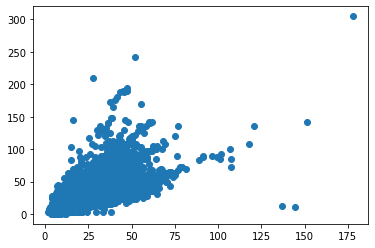

In [142]:
plt.scatter(results_df['Prediction'], results_df['Actual'])


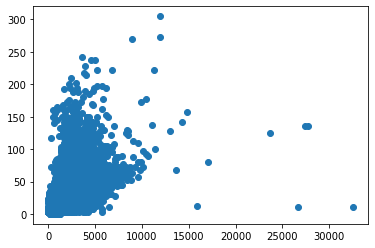

In [144]:
plt.scatter(X['Trip Seconds'], y)

### Test Models

In [116]:
test_clf = linear_model.SGDRegressor()


In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [.01, .001, .0001, .00001],
#               'epsilon': [0.1, 0.01, 0.001, 0.0001],
#               'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
#               'eta0':[.1, .01, .001],
#               'early_stopping' : [True],
#               'tol': [1e-4, 1e-3, 1e-2, 1e-1],
              'max_iter' : [1000, 10000, 100000]}
grid = GridSearchCV(test_clf, param_grid, verbose=3)

In [121]:
test_clf.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [122]:
grid.fit(X_train, y_train)

/Users/maxwellpatterson/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] alpha=0.01, max_iter=1000 .......................................
[CV]  alpha=0.01, max_iter=1000, score=-31893278059770681088802816.000, total= 7.6min
[CV] alpha=0.01, max_iter=1000 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.6min remaining:    0.0s


[CV]  alpha=0.01, max_iter=1000, score=-156157594216551658188439552.000, total= 3.4min
[CV] alpha=0.01, max_iter=1000 .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.0min remaining:    0.0s


[CV]  alpha=0.01, max_iter=1000, score=-465342701870478845062152192.000, total= 4.6min
[CV] alpha=0.01, max_iter=10000 ......................................
[CV]  alpha=0.01, max_iter=10000, score=-1199010896811540512505856.000, total= 6.1min
[CV] alpha=0.01, max_iter=10000 ......................................
[CV]  alpha=0.01, max_iter=10000, score=-164793525105497831284670464.000, total= 3.9min
[CV] alpha=0.01, max_iter=10000 ......................................
[CV]  alpha=0.01, max_iter=10000, score=-48574168776107689089433600.000, total= 3.4min
[CV] alpha=0.01, max_iter=100000 .....................................
[CV]  alpha=0.01, max_iter=100000, score=-18862714017205143763681280.000, total= 5.1min
[CV] alpha=0.01, max_iter=100000 .....................................
[CV]  alpha=0.01, max_iter=100000, score=-350725786489393821501095936.000, total= 4.7min
[CV] alpha=0.01, max_iter=100000 .....................................
[CV]  alpha=0.01, max_iter=100000, score=-7459257

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 167.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.001, 0.0001, 1e-05],
                         'max_iter': [1000, 10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=No

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential()
# model.add(Dense(units=283, activation='relu', input_dim=283))
# model.add(Dense(units=1, activation='softmax'))

In [ ]:
# model.summary()

In [ ]:
# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# from tensorflow.keras.utils import to_categorical

In [ ]:
# y_train_categorical = to_categorical(y_train)
# y_test_categorical = to_categorical(y_test)

In [ ]:
# model.fit(
#     X_train_scaled,
#     y_train_categorical,
#     epochs=283,
#     shuffle=True,
#     verbose=2
# )

In [123]:
# List the best score
print(f'Best Score: {grid.best_score_}')
print(f'Best Params: {grid.best_params_}')

Best Score: -7.152215663193909e+25
Best Params: {'alpha': 0.01, 'max_iter': 10000}


In [124]:
# len(grid.best_params_)
grid.best_params_

{'alpha': 0.01, 'max_iter': 10000}

In [125]:
clf.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [128]:
clf_test = linear_model.SGDRegressor(alpha = grid.best_params_['alpha'], \
#                         early_stopping = grid.best_params_['early_stopping'], \
#                         epsilon = grid.best_params_['epsilon'], eta0 = grid.best_params_['eta0'], \
#                         learning_rate = grid.best_params_['learning_rate'], \
#                         tol = grid.best_params_['tol'], 
                        max_iter = grid.best_params_['max_iter'])
clf_test.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
# double_check = linear_model.SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
#              eta0=0.01, fit_intercept=True, l1_ratio=0.15,
#              learning_rate='invscaling', loss='squared_loss', max_iter=1000,
#              n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
#              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
#              warm_start=False)
# double_check.fit(X_train_scaled, y_train)

In [129]:
test_scaled_predict = clf_test.predict(X_test_scaled)

In [ ]:
# double_check_scaled = double_check.predict(X_test_scaled)

In [ ]:
# double_check_score = double_check.score(X_train_scaled, y_train)
# double_check_score

In [130]:
test_score = clf_test.score(X_train_scaled, y_train)
test_score

0.41208914269472907

In [131]:
clf_test.score(X_test_scaled, y_test)

0.4201670892092394

In [132]:
test_results_df = pd.DataFrame(columns = ['Prediction', 'Actual'])

In [133]:
test_results_df['Prediction'] = test_scaled_predict

In [134]:
test_results_df['Actual'] = true_values

In [135]:
test_percent_change = []
for i in range(len(test_scaled_predict)):
    test_percent_change.append(100 *((test_scaled_predict[i] - true_values[i]) / true_values[i]))

/Users/maxwellpatterson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [136]:
test_results_df['Percent Change'] = test_percent_change

In [137]:
bins = [min(test_percent_change), -20, -10, -5, 0, 5, 10, 20, max(test_percent_change)]
labels = ['-20% or worse','-20% to -10%','-10% to -5%', '-5% to 0%', '0% to 5%', '5% to 10%', '10% to 20%', '20% or worse']


In [138]:
test_results_df['binned'] = pd.cut(test_results_df['Percent Change'], bins=bins, labels=labels)

In [139]:
test_results_df.head()

,Prediction,Actual,Percent Change,binned
0,10.890640,20.0,-45.546800,-20% or worse
1,8.983435,10.0,-10.165655,-20% to -10%
2,10.286385,5.0,105.727693,20% or worse
3,9.614706,15.0,-35.901963,-20% or worse
4,10.048097,10.0,0.480967,0% to 5%


In [140]:
test_results_df['binned'].value_counts()

20% or worse     129325
-20% or worse     67241
-20% to -10%      28427
10% to 20%        24452
5% to 10%         13388
0% to 5%          12569
-10% to -5%       12246
-5% to 0%         11749
Name: binned, dtype: int64

## Save Model

In [ ]:
plt.scatter(test_results_df['Prediction'], test_results_df['Actual'])

In [ ]:
results_df.head()

In [ ]:
# pickle.dump(clf, open('initial_model.p', 'wb'))